In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
traj = md.load("trajfile.dcd",top="topfile.pdb")

/Users/haoqi/opt/anaconda3/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbstructure.py:435: UserWarning: WARNING: two consecutive residues with same number (ATOM   5712  H   NMA A 358     -11.096 -11.077 -23.224  0.00  0.00      C2   H  , ATOM   5711  HZ3 LYS A 358     -17.601 -12.545 -21.968  0.00  0.00      C2   H  )
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (atom, self._current_residue.atoms[-1]))


In [3]:
traj

<mdtraj.Trajectory with 1001 frames, 5753 atoms, 365 residues, and unitcells at 0x7f8ffaddaa30>

In [4]:
pca1 = PCA()

traj.superpose(traj, 0)

<mdtraj.Trajectory with 1001 frames, 5753 atoms, 365 residues, and unitcells at 0x7f8ffaddaa30>

In [5]:
reduced_cartesian = pca1.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms * 3))
print(reduced_cartesian.shape)

(1001, 1001)


In [29]:
traj.time2 = traj.time/100
xlabels='PC1 '+str(pca1.explained_variance_ratio_[0]*100)[0:6]+"%"
xlabels

'PC1 18.004%'

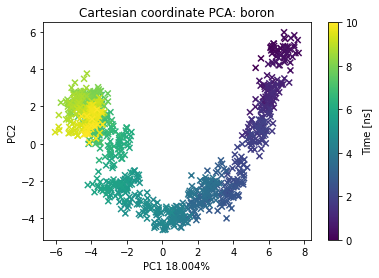

In [30]:
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=traj.time2)

plt.xlabel(xlabels)
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA: boron')
cbar = plt.colorbar()
cbar.set_label('Time [ns]')
plt.savefig("Cartesian_PCA_md.png")

In [16]:
pca1.explained_variance_ratio_[0:10]

array([0.18004805, 0.0708082 , 0.05655202, 0.04832878, 0.02964108,
       0.02728827, 0.023637  , 0.01728315, 0.01454457, 0.01376149],
      dtype=float32)

In [17]:
import numpy
pca1.explained_variance_ratio_
numpy.savetxt("explained_variance_ratio__cartesian2.csv", pca1.explained_variance_ratio_, delimiter=",")

In [ ]:
pca2 = PCA()

from itertools import combinations
# this python function gives you all unique pairs of elements from a list

atom_pairs = list(combinations(range(traj.n_atoms), 2))
pairwise_distances = md.geometry.compute_distances(traj, atom_pairs)
print(pairwise_distances.shape)
reduced_distances = pca2.fit_transform(pairwise_distances)

In [ ]:
plt.figure()
plt.scatter(reduced_distances[:, 0], reduced_distances[:,1], marker='x', c=traj.time2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pairwise distance PCA: boron')
cbar = plt.colorbar()
cbar.set_label('Time [ns]')
plt.savefig("Pairwise_PCA_md.png")